In [ ]:
# # IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# # THEN FEEL FREE TO DELETE THIS CELL.
# # NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# # ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# # NOTEBOOK.
# import kagglehub
# faresabbasai2022_skin_burns_dataset_path = kagglehub.dataset_download('faresabbasai2022/skin-burns-dataset')

# print('Data source import complete.')


 12%|█▏        | 173M/1.42G [00:04<00:32, 41.6MB/s]


KeyboardInterrupt: 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Overview
A burn is an injury to the skin or other organic tissue primarily caused by heat or due to radiation, radioactivity, electricity, friction or contact with chemicals.

Thermal (heat) burns occur when some or all the cells in the skin or other tissues are destroyed by:

hot liquids (scalds)
hot solids (contact burns)
flames (flame burns).
The problem
Burns are a global public health problem, accounting for an estimated 180 000 deaths annually. The majority of these occur in low- and middle-income countries and almost two thirds occur in the WHO African and South-East Asia Regions.

In many high-income countries, burn death rates have been decreasing, and the rate of child deaths from burns is currently over 7 times higher in low- and middle-income countries than in high-income countries.

Non-fatal burns are a leading cause of morbidity, including prolonged hospitalization, disfigurement and disability, often with resulting stigma and rejection.

Burns are among the leading causes of disability-adjusted life-years (DALYs) lost in low- and middle-income countries.
Hospitalization for burns varies by country and is influenced by health service payment programmes, but among countries studied hospitalization trends are going towards shorter stays and an increased proportion of burns being treated in specialized burn centres (1).
Some country data
In India, over 1 million people are moderately or severely burnt every year.
Nearly 173 000 Bangladeshi children are moderately or severely burnt every year.
In Bangladesh, Colombia, Egypt and Pakistan, 17% of children with burns have a temporary disability and 18% have a permanent disability.
Burns are the second most common injury in rural Nepal, accounting for 5% of disabilities.
In 2008, over 410 000 burn injuries occurred in the United States of America, with approximately 40 000 requiring hospitalization.
Economic impact
Direct care costs for burns vary widely but tend towards being generally expensive with a 2014 systematic review finding a mean total healthcare cost per burn patient of US$ 88 218 (range US$ 704–717 306).

In South Africa an estimated US$ 26 million is spent annually for care of burns from kerosene (paraffin) cookstove incidents. Indirect costs such as lost wages, prolonged care for deformities and emotional trauma, and commitment of family resources, also contribute to the socioeconomic impact.

**Import Libraries**

In [3]:
# data processing, CSV & image file I/O
import os
import re
import requests
from PIL import Image
import pandas as pd
import numpy as np

#libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# import Deep learning Libraries
#preprocessing, modeling & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import regularizers
import warnings
warnings.filterwarnings('ignore')

In [4]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7 ,preprocess_input, decode_predictions

# Train

In [5]:
# Generate data paths with labels
train_data_dir = '/content/drive/MyDrive/Data Set/skin burn dataset/train'
labels = []
filepaths = []
folds = os.listdir(train_data_dir)
# print(folds)

import random
for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    # Ambil hanya 25% dari file secara acak
    selected_files = random.sample(filelist, int(len(filelist) * 0.25))
    for file in selected_files:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')

train_df = pd.concat([Fseries, Lseries], axis= 1)
# Mengurangi data training menjadi 10%
from sklearn.model_selection import train_test_split
_, train_df, _, _ = train_test_split(
    train_df, train_df['labels'], test_size=0.01, stratify=train_df['labels'], random_state=42
)

train_df = pd.concat([Fseries, Lseries], axis= 1)

In [6]:
train_df

,filepaths,labels
0,/content/drive/MyDrive/Data Set/skin burn data...,3nd degree burn
1,/content/drive/MyDrive/Data Set/skin burn data...,3nd degree burn
2,/content/drive/MyDrive/Data Set/skin burn data...,3nd degree burn
3,/content/drive/MyDrive/Data Set/skin burn data...,3nd degree burn
4,/content/drive/MyDrive/Data Set/skin burn data...,3nd degree burn
...,...,...
7389,/content/drive/MyDrive/Data Set/skin burn data...,2nd degree burn
7390,/content/drive/MyDrive/Data Set/skin burn data...,2nd degree burn
7391,/content/drive/MyDrive/Data Set/skin burn data...,2nd degree burn
7392,/content/drive/MyDrive/Data Set/skin burn data...,2nd degree burn


In [7]:
# Generate data paths with labels
test_data_dir = '/content/drive/MyDrive/Data Set/skin burn dataset/test'
filepaths = []
labels = []

folds = os.listdir(test_data_dir)
# print(folds)

for fold in folds:
    foldpath = os.path.join(test_data_dir, fold)

    # Check if foldpath is a directory
    if os.path.isdir(foldpath):
        filelist = os.listdir(foldpath)

        for file in filelist:
            fpath = os.path.join(foldpath, file)
            # Rest of your code processing each file

            filepaths.append(fpath)
            labels.append(fold)
# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')

test_df = pd.concat([Fseries, Lseries], axis= 1)

NameError: name '_df_0' is not defined

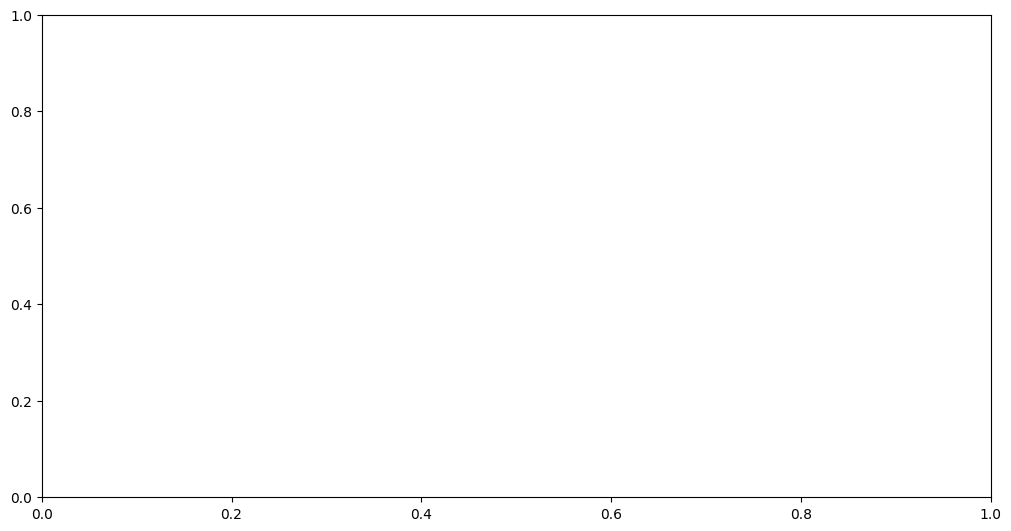

In [ ]:
# from matplotlib import pyplot as plt
# import seaborn as sns
# def _plot_series(series, series_name, series_index=0):
#   palette = list(sns.palettes.mpl_palette('Dark2'))
#   counted = (series['index']
#                 .value_counts()
#               .reset_index(name='counts')
#               .rename({'index': 'index'}, axis=1)
#               .sort_values('index', ascending=True))
#   xs = counted['index']
#   ys = counted['counts']
#   plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
# df_sorted = _df_0.sort_values('index', ascending=True)
# _plot_series(df_sorted, '')
# sns.despine(fig=fig, ax=ax)
# plt.xlabel('index')
# _ = plt.ylabel('count()')

In [8]:
# Generate data paths with labels
val_data_dir = '/content/drive/MyDrive/Data Set/skin burn dataset/valid'
labels = []
filepaths = []
folds = os.listdir(val_data_dir)
for fold in folds:
    foldpath = os.path.join(val_data_dir, fold)
    if os.path.isdir(foldpath):
      filelist = os.listdir(foldpath)
      for file in filelist:
          fpath = os.path.join(foldpath, file)

          filepaths.append(fpath)
          labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
valid_df = pd.concat([Fseries, Lseries], axis= 1)

In [9]:
valid_df

,filepaths,labels
0,/content/drive/MyDrive/Data Set/skin burn data...,1st degree burn
1,/content/drive/MyDrive/Data Set/skin burn data...,1st degree burn
2,/content/drive/MyDrive/Data Set/skin burn data...,1st degree burn
3,/content/drive/MyDrive/Data Set/skin burn data...,1st degree burn
4,/content/drive/MyDrive/Data Set/skin burn data...,1st degree burn
...,...,...
15003,/content/drive/MyDrive/Data Set/skin burn data...,2nd degree burn
15004,/content/drive/MyDrive/Data Set/skin burn data...,2nd degree burn
15005,/content/drive/MyDrive/Data Set/skin burn data...,2nd degree burn
15006,/content/drive/MyDrive/Data Set/skin burn data...,2nd degree burn


In [10]:
valid_df, test_df = train_test_split(valid_df,  train_size= 0.5, shuffle= True, random_state= 123)


In [11]:
test_df

,filepaths,labels
3938,/content/drive/MyDrive/Data Set/skin burn data...,1st degree burn
10357,/content/drive/MyDrive/Data Set/skin burn data...,2nd degree burn
2202,/content/drive/MyDrive/Data Set/skin burn data...,1st degree burn
4153,/content/drive/MyDrive/Data Set/skin burn data...,1st degree burn
8659,/content/drive/MyDrive/Data Set/skin burn data...,3nd degree burn
...,...,...
9088,/content/drive/MyDrive/Data Set/skin burn data...,3nd degree burn
10978,/content/drive/MyDrive/Data Set/skin burn data...,2nd degree burn
1063,/content/drive/MyDrive/Data Set/skin burn data...,1st degree burn
7329,/content/drive/MyDrive/Data Set/skin burn data...,3nd degree burn


In [12]:
 #crobed image size
batch_size = 16
img_size = (300, 300)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()
val_gen= ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels',
                                       target_size=img_size, class_mode='categorical',
                                       color_mode='rgb', shuffle=True, batch_size=batch_size)
train_image_count = len(train_gen.filenames)  # Get the number of training images

valid_gen = val_gen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels',
                                       target_size=img_size, class_mode='categorical',
                                       color_mode='rgb', shuffle=True, batch_size=batch_size)
valid_image_count = len(valid_gen.filenames)  # Get the number of validation images

test_gen = ts_gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels',
                                      target_size=img_size, class_mode='categorical',
                                      color_mode='rgb', shuffle=False, batch_size=batch_size)
test_image_count = len(test_gen.filenames)  # Get the number of testing images

print(f"{train_image_count} Train images, {valid_image_count} Valid images, and {test_image_count} Test images")

Found 7394 validated image filenames belonging to 3 classes.
Found 7504 validated image filenames belonging to 3 classes.
Found 7504 validated image filenames belonging to 3 classes.
7394 Train images, 7504 Valid images, and 7504 Test images


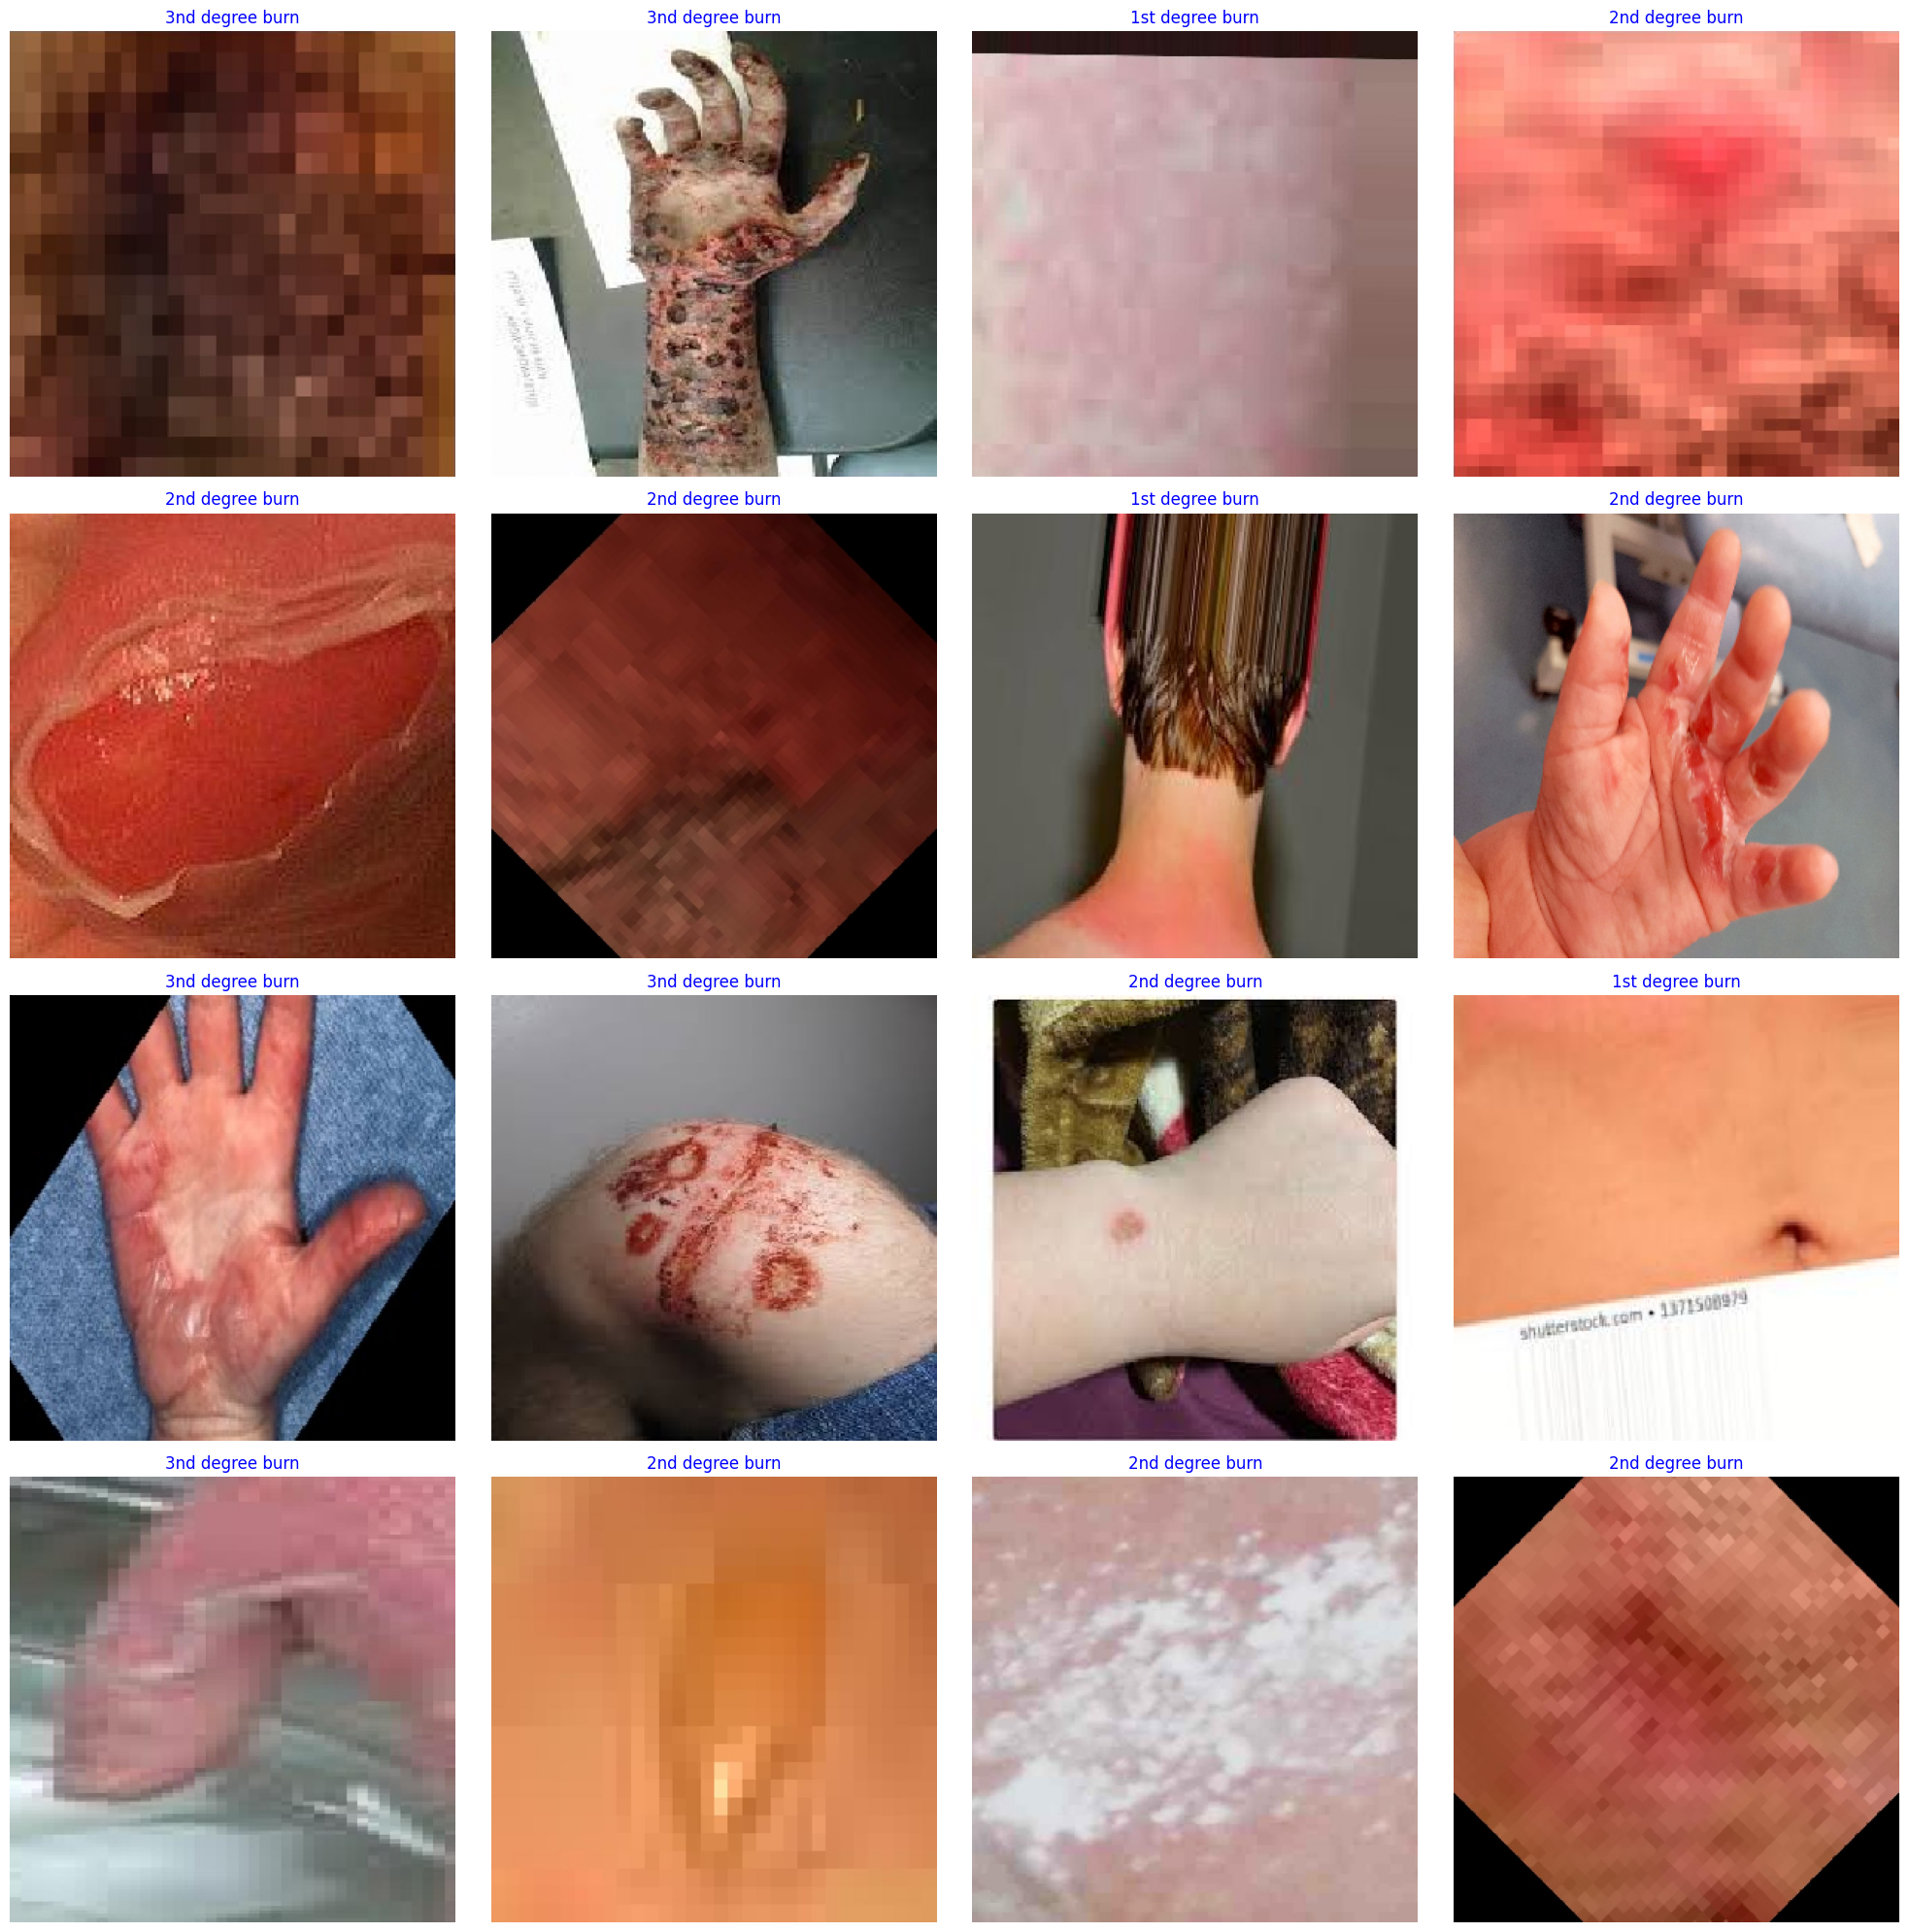

In [13]:
#Samples Of The Data
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator
# # difference between next iterator and for iterator


plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
#Create Model Structure
from tensorflow.keras.layers import MaxPooling2D, Input
img_size = (300, 300)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

base_model = tf.keras.applications.EfficientNetB0(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')

# Define input layer with explicit shape
input_tensor = Input(shape=img_shape)

# Connect base_model to the input layer
x = base_model(input_tensor)

# Flatten the output of base_model
x = Flatten()(x)

# Add the remaining layers
x = Dense(256, activation= 'relu')(x)
x = Dropout(rate= 0.3)(x)
output_tensor = Dense(class_count, activation= 'softmax')(x)

# Create the model with input and output tensors
model = tf.keras.Model(inputs=input_tensor, outputs=output_tensor)


model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

#model.summary()

In [14]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Input, Dense, Dropout
from tensorflow.keras.optimizers import Adamax
import tensorflow as tf

# Define input image size and channels
img_size = (300, 300)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Define number of classes
class_count = len(list(train_gen.class_indices.keys()))

# Load a lighter pre-trained model: MobileNetV2
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=img_shape
)

# Freeze base model layers to reduce trainable parameters
for layer in base_model.layers:
    layer.trainable = False

# Define input layer with explicit shape
input_tensor = Input(shape=img_shape)

# Connect base_model to the input layer
x = base_model(input_tensor)

# Use GlobalAveragePooling2D to reduce dimensionality without adding parameters
x = GlobalAveragePooling2D()(x)

# Add a smaller Dense layer
x = Dense(64, activation='relu')(x)

# Add Dropout to prevent overfitting
x = Dropout(rate=0.3)(x)

# Output layer with softmax activation
output_tensor = Dense(class_count, activation='softmax')(x)

# Create the model with input and output tensors
model = tf.keras.Model(inputs=input_tensor, outputs=output_tensor)

# Compile the model with Adamax optimizer
model.compile(
    optimizer=Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 300, 300, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 10, 10, 1280)        │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          81,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,340,163 (8.93 MB)

 Trainable params: 82,179 (321.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Create Model Structure
# Create Model Structure
img_size = (300, 300)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')
# base_model.trainable = False

# Define the input layer with the correct shape
input_layer = tf.keras.layers.Input(shape=img_shape)

# Pass the input through the base model
x = base_model(input_layer)

model = Sequential([
    tf.keras.layers.InputLayer(input_shape=img_shape), # Add an InputLayer to define the input shape for the Sequential model
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(0.016), activity_regularizer= regularizers.l1(0.006), # Changed l=0.016 to 0.016
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])


model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

# model.summary()

In [15]:
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense
img_size = (300, 300)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Define number of classes
class_count = len(list(train_gen.class_indices.keys()))

# Load pre-trained model EfficientNetB0
base_model = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=img_shape,
    pooling='max'
)

# Freeze base model layers to reduce trainable parameters
for layer in base_model.layers:
    layer.trainable = False

# Build the model using Sequential
model = Sequential([
    tf.keras.layers.InputLayer(input_shape=img_shape),
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(128,
          kernel_regularizer=regularizers.l2(0.01),
          activity_regularizer=regularizers.l1(0.005),
          bias_regularizer=regularizers.l1(0.005),
          activation='relu'),
    Dropout(rate=0.4, seed=123),
    Dense(class_count, activation='softmax')
])

# Compile the model with Adamax optimizer
model.compile(
    optimizer=Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 1280)                │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,219,046 (16.09 MB)

 Trainable params: 166,915 (652.01 KB)

 Non-trainable params: 4,052,131 (15.46 MB)

In [17]:
batch_size = 32 # set batch size for training
epochs = 10   # number of all epochs in training

history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen,
                    validation_steps= None, shuffle= False)

Epoch 1/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 4953s 11s/step - accuracy: 0.6268 - loss: 5.4072 - val_accuracy: 0.6070 - val_loss: 2.7279
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2198s 5s/step - accuracy: 0.6678 - loss: 2.5161 - val_accuracy: 0.6071 - val_loss: 2.0815
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2162s 5s/step - accuracy: 0.6952 - loss: 1.8830 - val_accuracy: 0.6309 - val_loss: 1.5907
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2254s 5s/step - accuracy: 0.7075 - loss: 1.4285 - val_accuracy: 0.6395 - val_loss: 1.3107
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2186s 5s/step - accuracy: 0.7181 - loss: 1.1749 - val_accuracy: 0.6557 - val_loss: 1.1450
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2174s 5s/step - accuracy: 0.7130 - loss: 1.0308 - val_accuracy: 0.6574 - val_loss: 1.0439
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2172s 5s/step - accuracy: 0.7320 - loss: 0.9418 - val_accuracy: 0.6732 - val_loss: 0.9654
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2186s 5s/step - accuracy: 0.7421 - loss: 0.8876 -

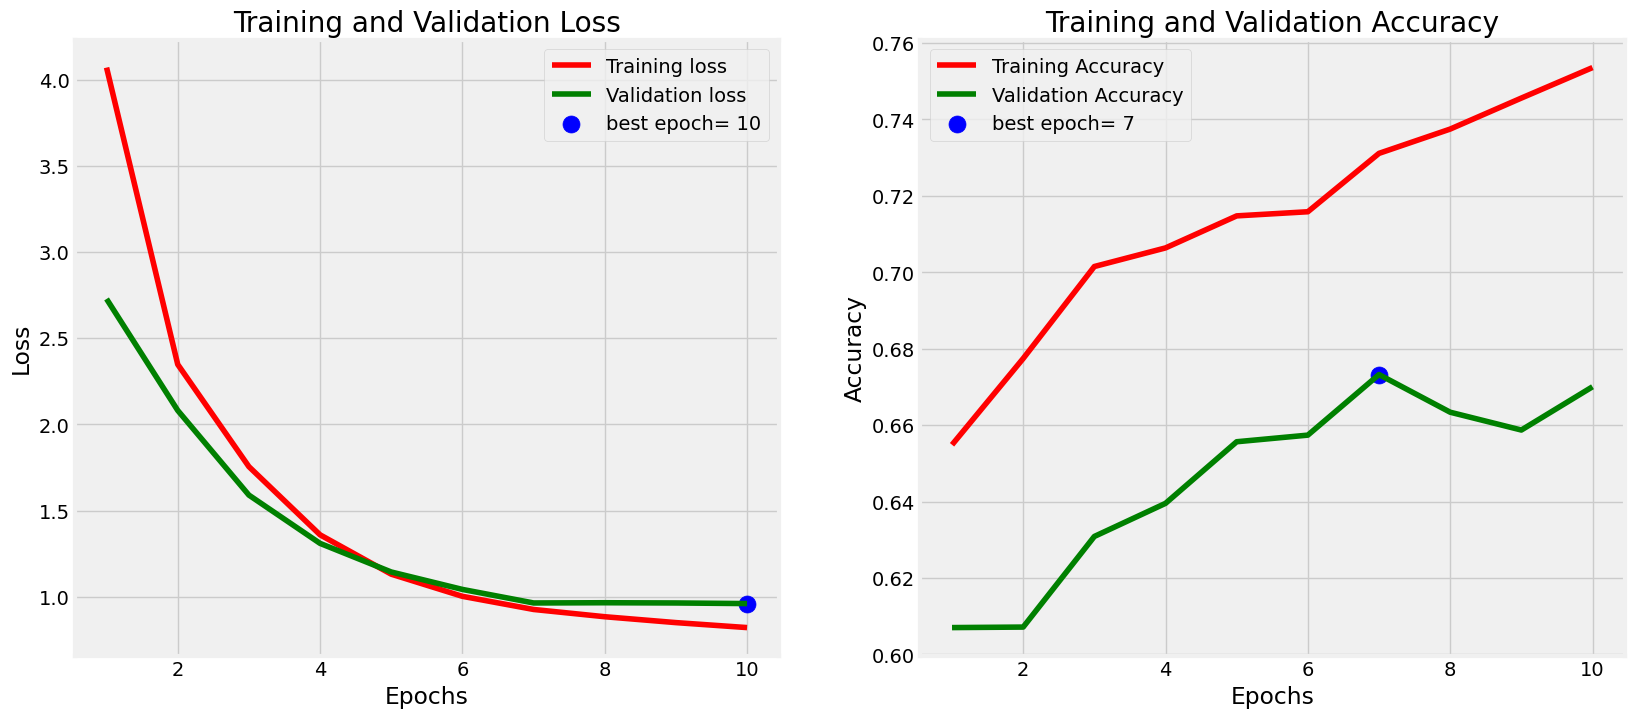

In [18]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

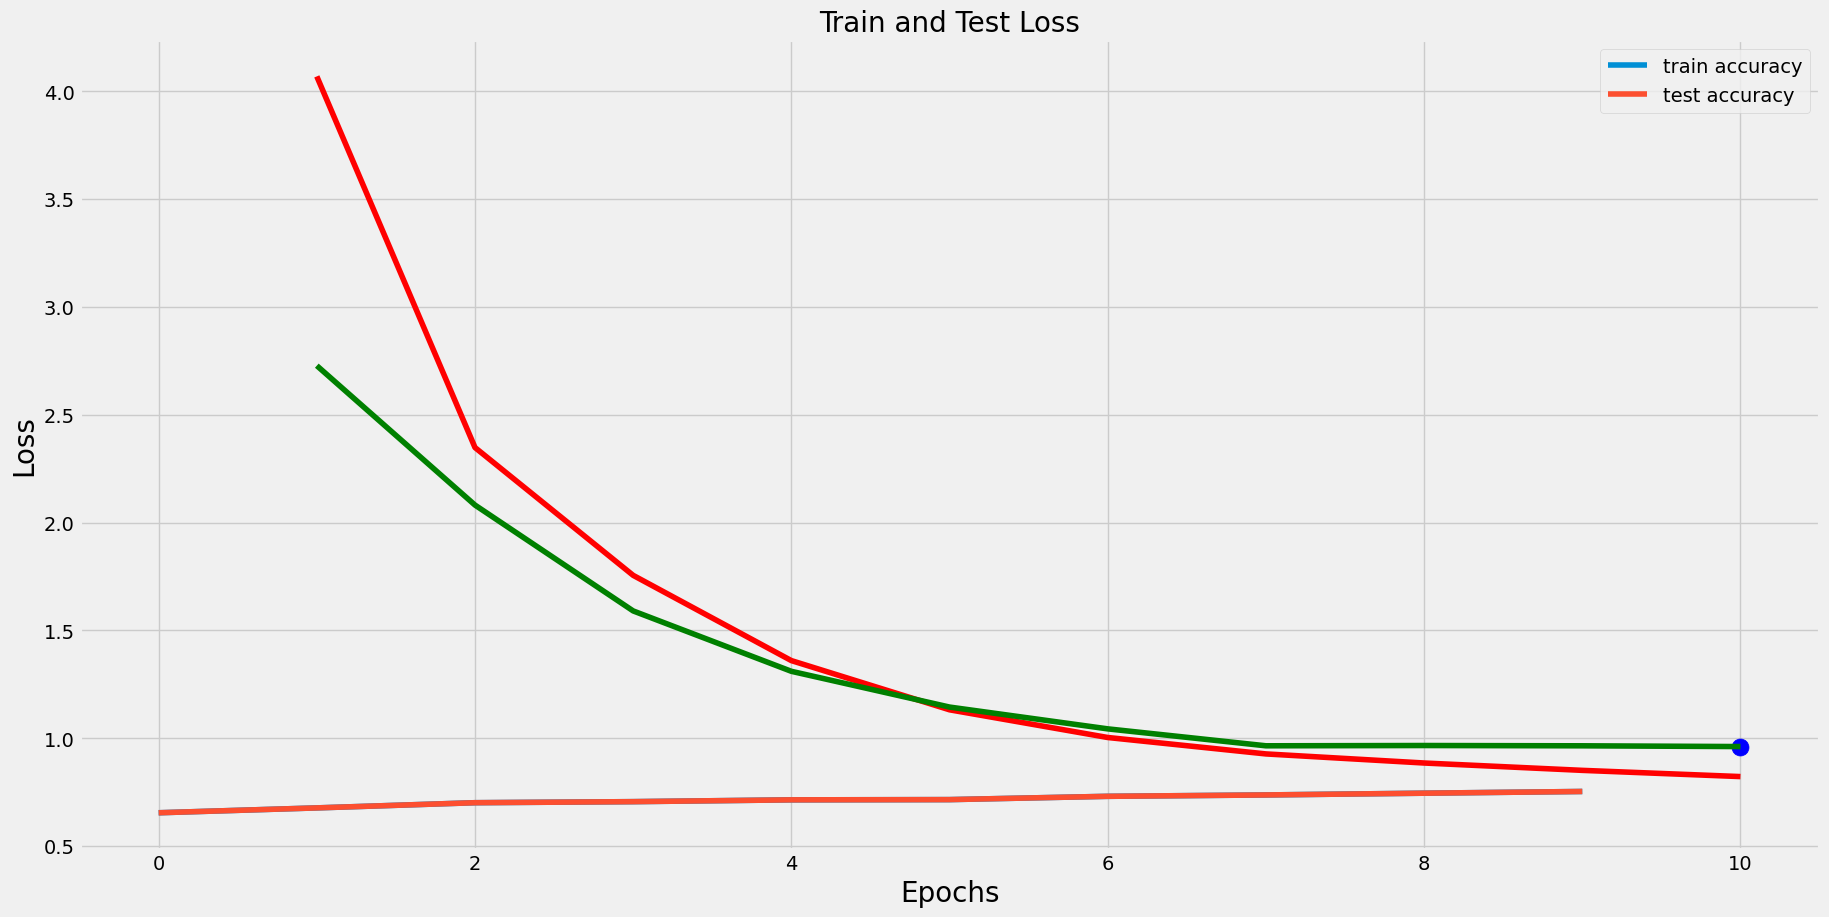

In [19]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc =  history.history['accuracy']
val_acc =  history.history['accuracy']
xc = range(len(tr_acc))

plt.figure(figsize=(20,10))
plt.plot(xc,train_acc,label='train accuracy')
plt.plot(xc,val_acc,label='test accuracy')
plt.legend()
plt.title('Train and Test Loss',size=20)
plt.xlabel('Epochs',size=20)
plt.ylabel('Loss',size=20)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.tight_layout
plt.show()

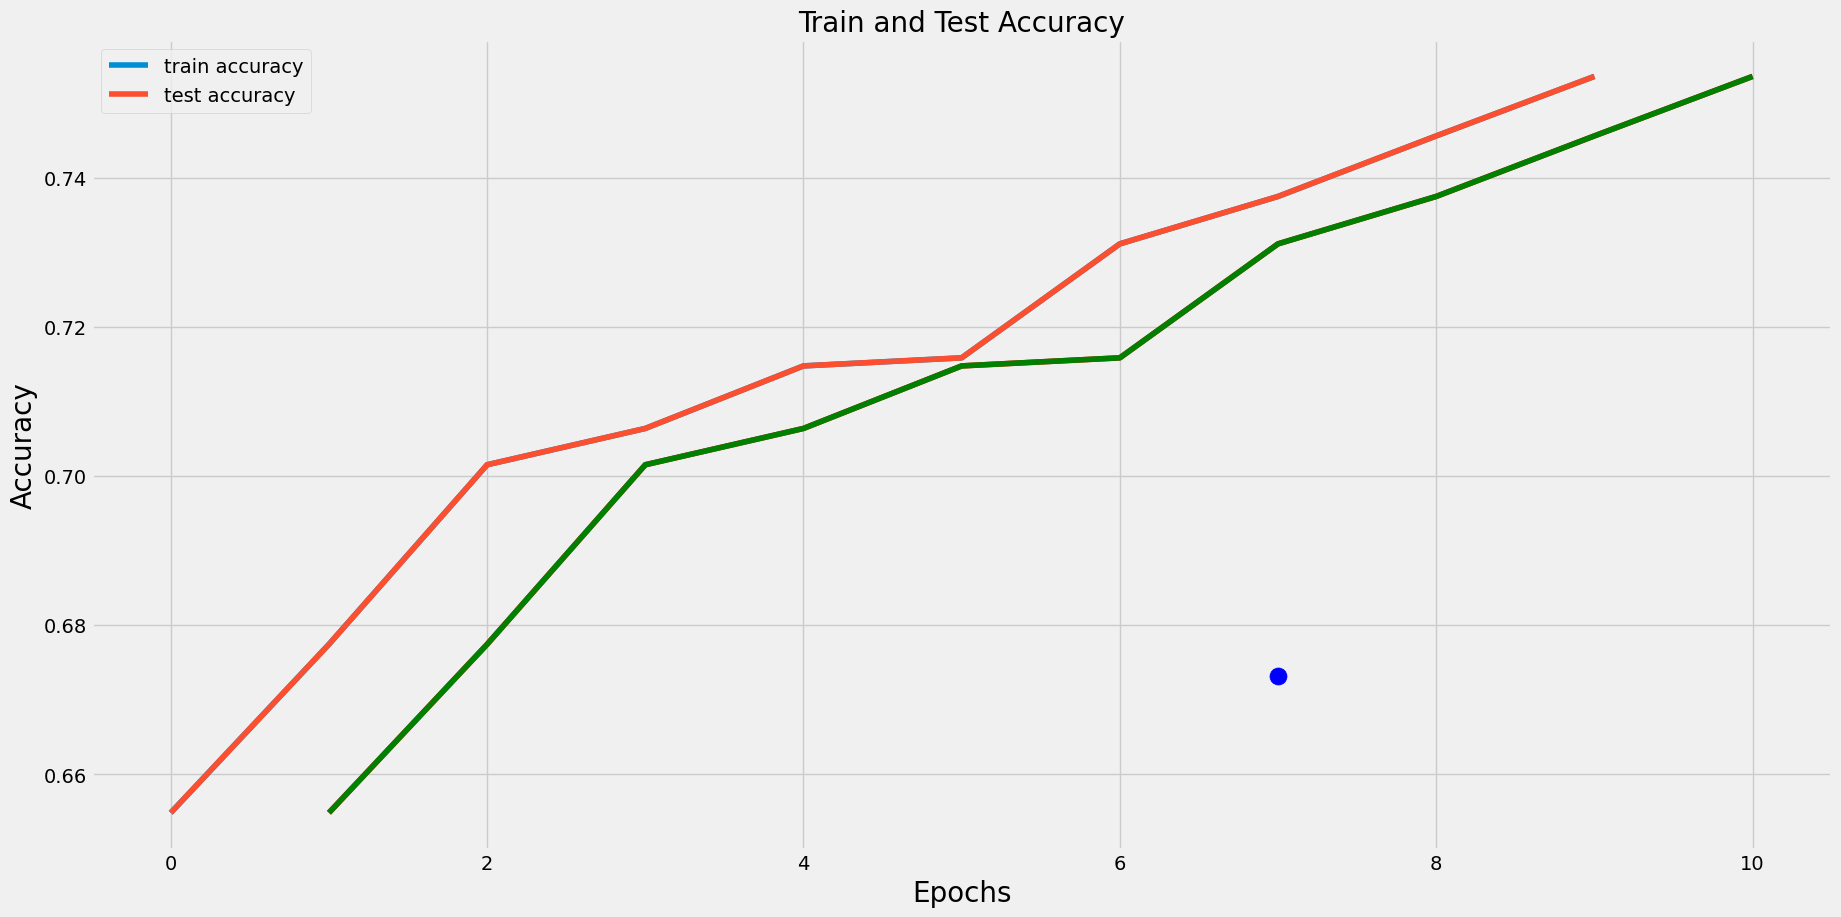

In [20]:
plt.figure(figsize=(20,10))
plt.plot(xc,train_acc,label='train accuracy')
plt.plot(xc,val_acc,label='test accuracy')
plt.legend()
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Train and Test Accuracy',size=20)
plt.xlabel('Epochs',size=20)
plt.ylabel('Accuracy',size=20)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')


plt.tight_layout
plt.show()

In [21]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

112/112 ━━━━━━━━━━━━━━━━━━━━ 283s 3s/step - accuracy: 0.8461 - loss: 0.6870
112/112 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.6522 - loss: 0.9752
112/112 ━━━━━━━━━━━━━━━━━━━━ 656s 6s/step - accuracy: 0.6902 - loss: 0.9353
Train Loss:  0.6967997550964355
Train Accuracy:  0.8359375
--------------------
Validation Loss:  0.9663318395614624
Validation Accuracy:  0.6640625
--------------------
Test Loss:  0.9711108803749084
Test Accuracy:  0.6674107313156128


In [23]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2379s 5s/step


In [24]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

                 precision    recall  f1-score   support

1st degree burn       0.94      0.52      0.67      3219
2nd degree burn       0.53      0.92      0.67      2622
3nd degree burn       0.86      0.57      0.69      1663

       accuracy                           0.67      7504
      macro avg       0.78      0.67      0.68      7504
   weighted avg       0.78      0.67      0.68      7504



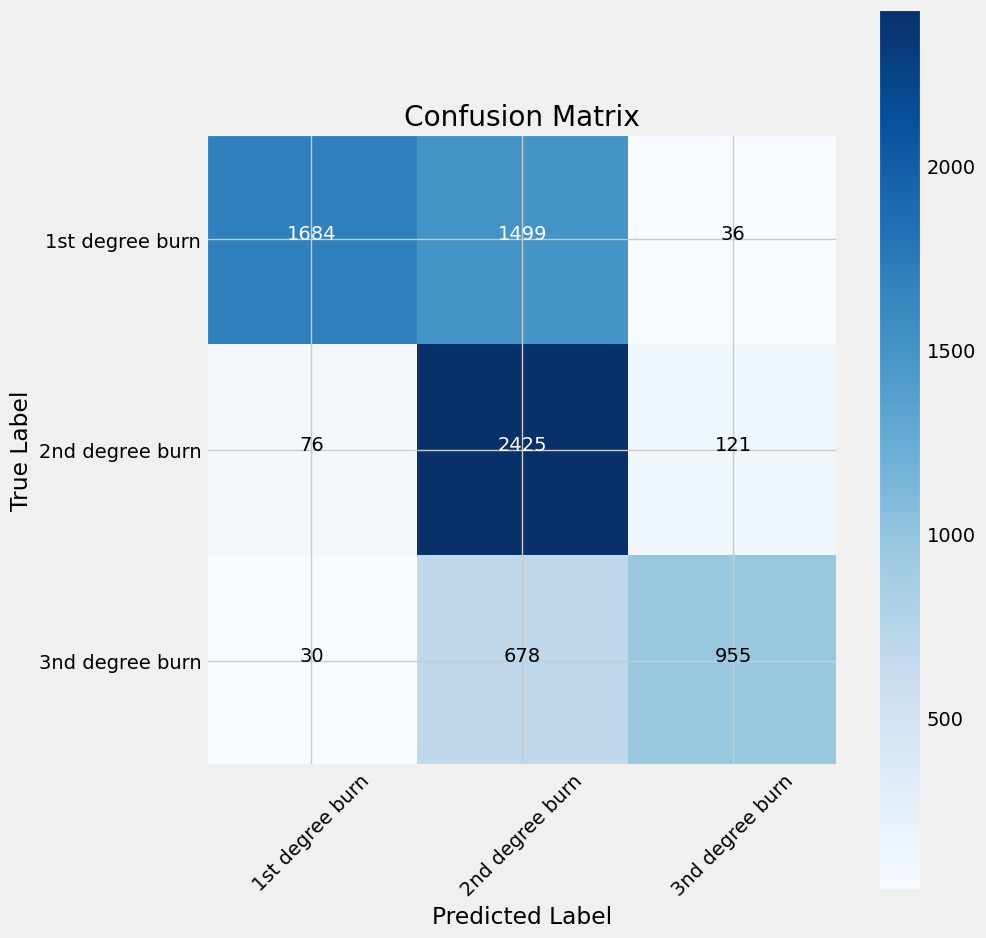

In [25]:
import itertools
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [26]:
model.save('Skin_Burns.h5')

In [ ]:
# model.save('my_model.keras')

In [27]:
loaded_model = tf.keras.models.load_model('/content/Skin_Burns.h5', compile=False)
loaded_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
image_path = '/kaggle/input/skin-burns-dataset/skin burn dataset/test/img1040_jpg.rf.9a354eba4a2879dd0a92aef88ed25147.jpg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = loaded_model.predict(img_array)
class_labels = classes
score = tf.nn.softmax(predictions[0])
print(f"{class_labels[tf.argmax(score)]}")

In [30]:
from tensorflow.contrib import lite
converter = lite.TFLiteConverter.from_keras_model_file('/content/Skin_Burns.h5')
tfmodel = converter.convert()
open ("Skin_Burns.tflite" , "wb") .write(tfmodel)

ModuleNotFoundError: No module named 'tensorflow.contrib'

In [31]:
import tensorflow as tf

# Instead of:
# from tensorflow.contrib import lite
# converter = lite.TFLiteConverter.from_keras_model_file('Skin_Burns.h5')

# Use:
converter = tf.lite.TFLiteConverter.from_keras_model_file('/content/Skin_Burns.h5')

tfmodel = converter.convert()
open ("Skin_Burns.tflite" , "wb") .write(tfmodel)

AttributeError: type object 'TFLiteConverterV2' has no attribute 'from_keras_model_file'

In [32]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('/content/Skin_Burns.h5')

# Create a TFLite converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Convert the model
tflite_model = converter.convert()

# Save the TFLite model
with open('Skin_Burns.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpjy4f_1s4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  137322135602576: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  137322135602384: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  137322135604112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137322135604496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137322135605456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137322135604688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137322135601424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137322135606416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137322135606032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137322135607376: TensorSpec(shape=(), dtype=tf.resource, name=Non